### Predicting Heart Disease using machine learning

In [1]:
#Import different libraries and model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load the data
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
## Let's find out how many class are there
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

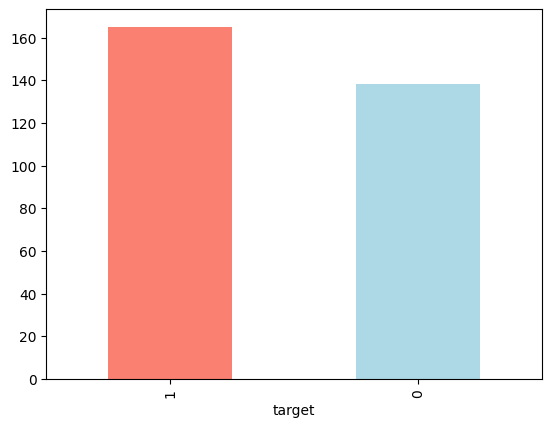

In [4]:
heart_disease["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [5]:
heart_disease.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Features

* Heart disease Frequency according to Sex
* Age vs Max Heart Rate For Heart Disease
* Check The Distribution of age
* Heart Disease Frequenct per unit chest pain type

In [8]:
heart_disease.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(heart_disease.target , heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


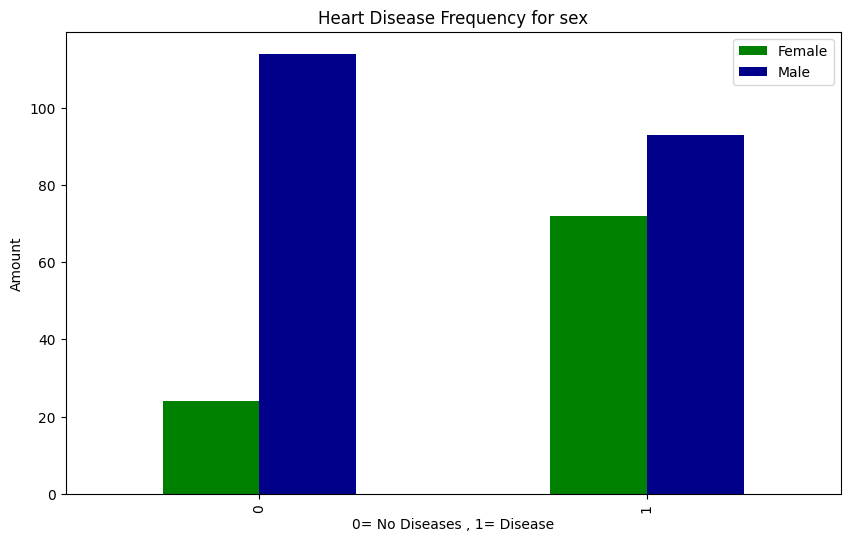

In [10]:
pd.crosstab(heart_disease.target , heart_disease.sex).plot(kind="bar",
                                                          figsize=(10,6),
                                                          color=["green","darkblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0= No Diseases , 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);


 ### Age vs Max Heart Rate For Heart Disease

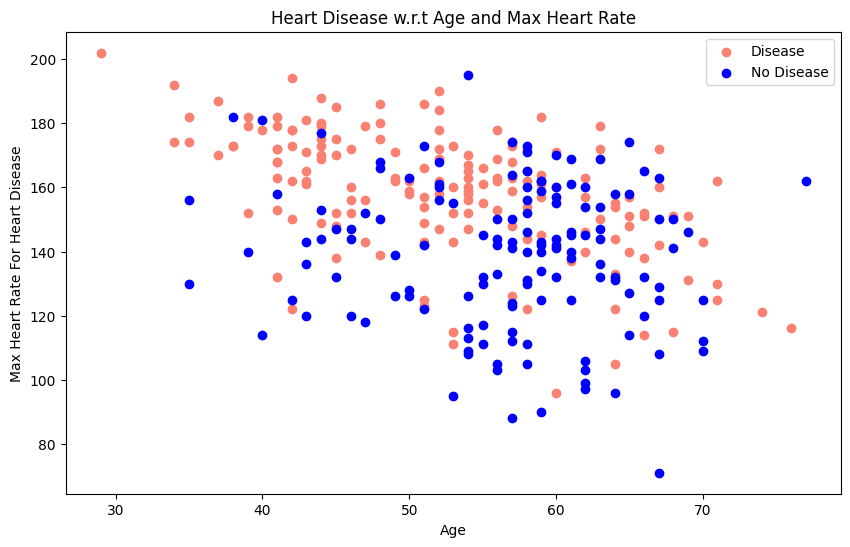

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(heart_disease.age[heart_disease.target==1],
           heart_disease.thalach[heart_disease.target==1],
           c="salmon");
plt.scatter(heart_disease.age[heart_disease.target==0],
           heart_disease.thalach[heart_disease.target==0],
           c="blue");
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate For Heart Disease");
plt.legend(["Disease","No Disease"])

### Check The Distribution of age 

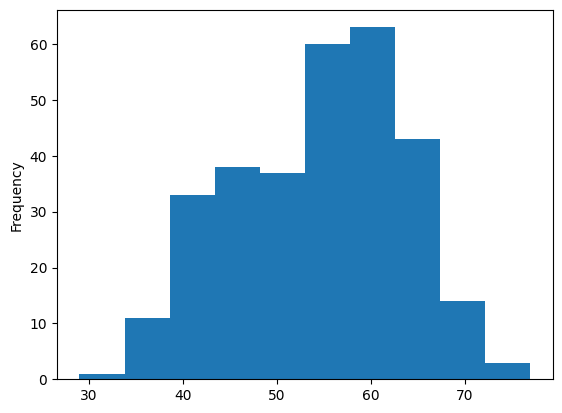

In [12]:
heart_disease.age.plot(kind="hist");

In [13]:
pd.crosstab(heart_disease.cp , heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


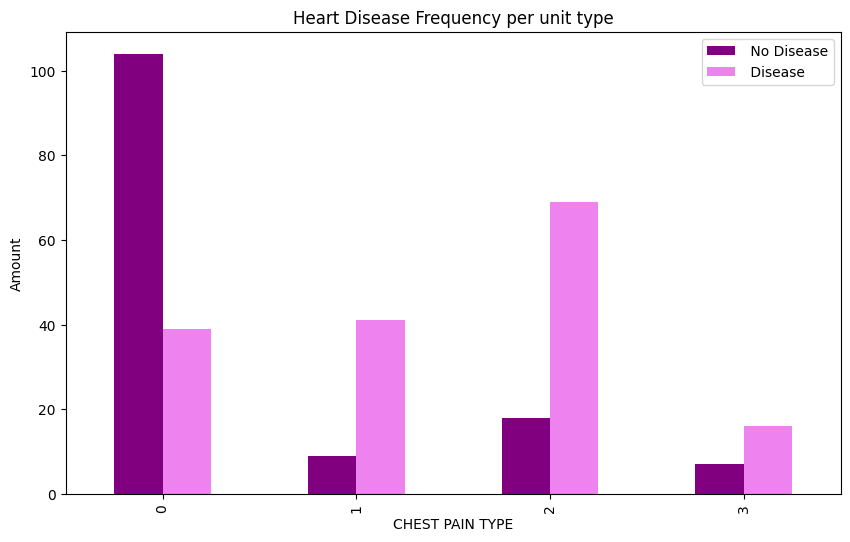

In [14]:
 pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind="bar",
                                                        figsize=(10,6),
                                                        color=["purple","violet"]);
plt.title("Heart Disease Frequency per unit type")
plt.xlabel("CHEST PAIN TYPE")
plt.ylabel("Amount")
plt.legend([" No Disease"," Disease"]);

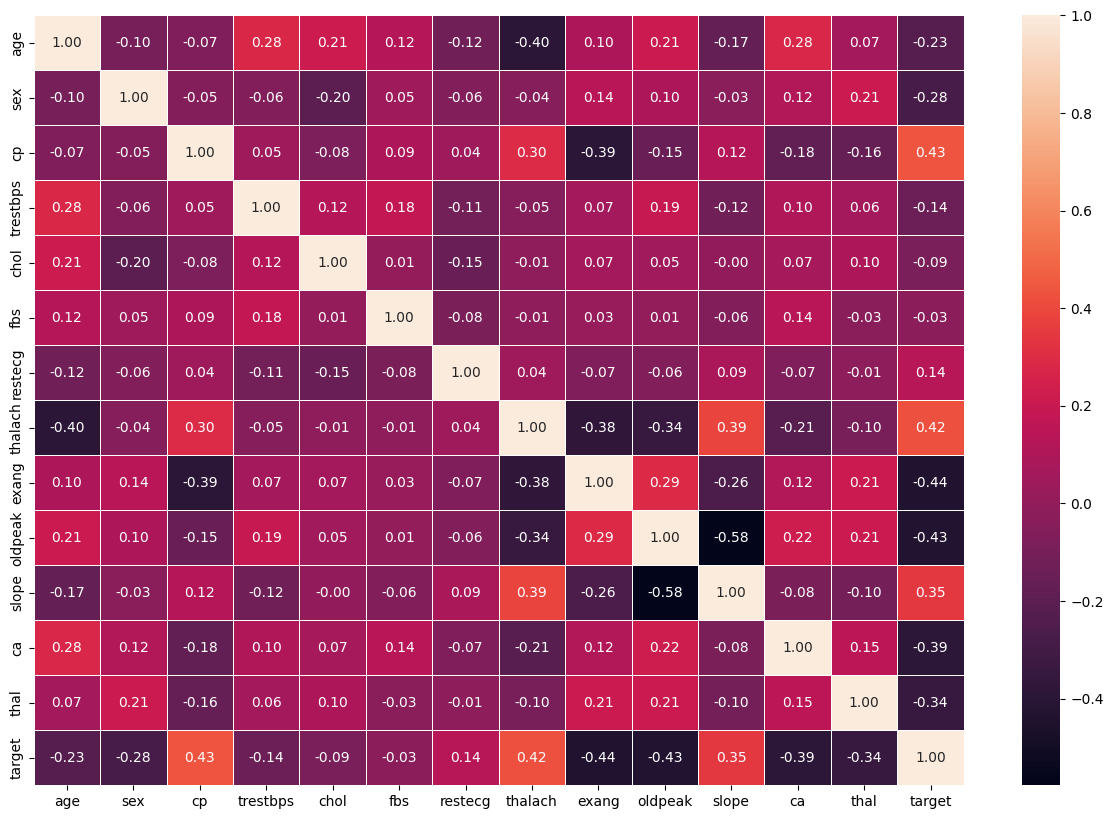

In [15]:
matrix_1 = heart_disease.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(matrix_1,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               )

# Modelling

In [16]:
x= heart_disease.drop("target",axis=1)
y= heart_disease["target"]


In [17]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
np.random.seed(42)
x_train , x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [20]:
models = {"Logistics Regression": LogisticRegression(max_iter=1000),
        "KNN":KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()
       }

def fit_and_score (models , x_train , x_test , y_train , y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of differnt Scikit learn machine Learning models
    x_train: training data(no labels)
    x_test:testing data(no lables)
    y_train:training labels
    y_test: test labels
    """
    np.random.seed(42)
    models_score = {}
    for name, model in models.items():
        model.fit(x_train,y_train)
        models_score[name] = model.score(x_test,y_test)
    return models_score

In [21]:
models_score = fit_and_score(models , x_train , x_test , y_train , y_test)

In [22]:
models_score

{'Logistics Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

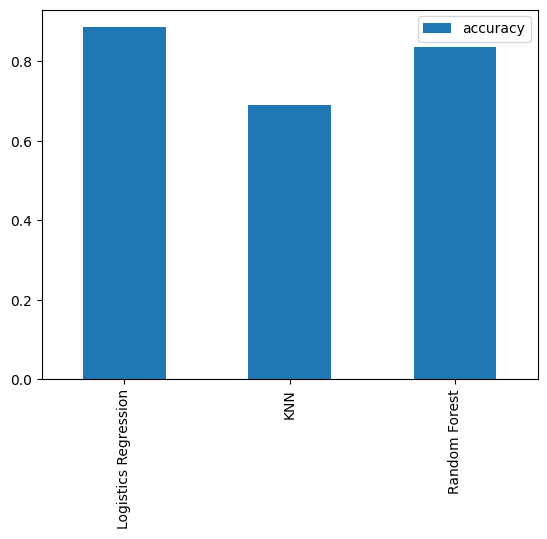

In [23]:
model_compare = pd.DataFrame(models_score  ,index=["accuracy"])
model_compare.T.plot.bar();

In [26]:
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train , y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test , y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN scores on the test: 75.41%


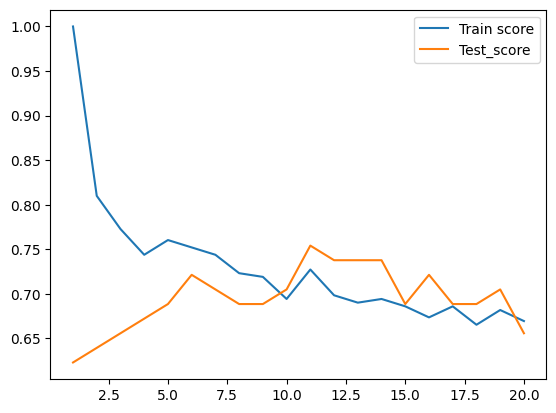

In [33]:
plt.plot(neighbors , train_scores , label="Train score")
plt.plot(neighbors,test_scores,label="Test_score")
plt.xlabel=("Number of neighbors")
plt.ylabel=("model_score")
plt.legend()
print(f"Maximum KNN scores on the test: {max(test_scores)*100:.2f}%");

In [44]:
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"]}
random_grids = {"n_estimators": np.arange(10,1000,50),
               "max_depth":[None,3,5,10],
               "min_samples_split":np.arange(2,20,2),
               "min_samples_leaf":(1,20,2)}

In [45]:
np.random.seed(42)

rs_log_grid = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_grid.fit(x_train ,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
rs_log_grid.score(x_test,y_test)

0.8852459016393442

In [50]:
np.random.seed(42)

rs_log_grid1 = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions = random_grids,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)
rs_log_grid1.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': (1, 20, 2),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [51]:
rs_log_grid1.score(x_test , y_test)

0.8852459016393442

In [52]:
y_preds = rs_log_grid1.predict(x_test)

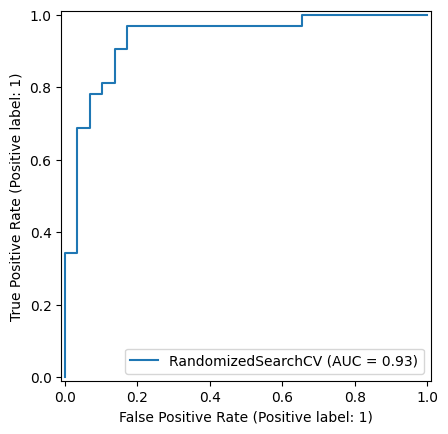

In [59]:
RocCurveDisplay.from_estimator(rs_log_grid1 , x_test , y_test)

In [60]:
print(confusion_matrix(y_test ,y_preds))

[[25  4]
 [ 3 29]]


TypeError: 'str' object is not callable

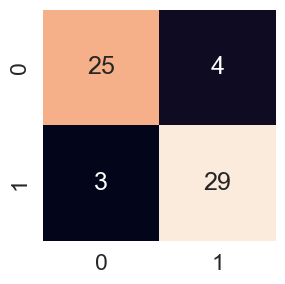

In [62]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test , y_preds):
    """
    PLots a confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test , y_preds)

In [63]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [66]:
rs_log_grid.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [68]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [69]:
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [70]:
cv_pre = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [71]:
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)

cv_recall

0.9272727272727274

In [72]:
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

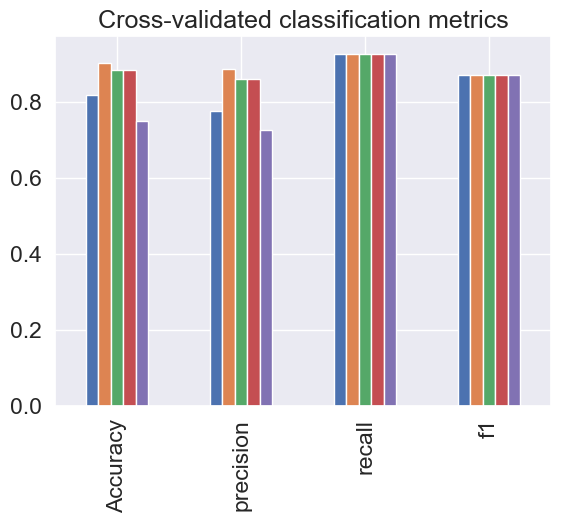

In [74]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "precision":cv_pre,
                          "recall":cv_recall,
                          "f1":cv_f1})

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);